In [1]:
from tehran_stocks_class import PinBall_Loss, get_Namad, train_model

/home/hadi/Desktop/python_ML_projects/projects/tehran_stock/venv/lib/python3.10/site-packages/statsforecast/core.py:25: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm


### reading CSV dataset

In [2]:
import pandas as pd
namad_getter = get_Namad()
namad_getter.readNamads_fromCSVfiles(dir = "dataset")

['محصولات غذايي و آشاميدني به جز قند و شكر-->شركت صنايع غذايي مينو شرق (غمينو) - بازار اول فرابورس.csv',
 'مخابرات-->شركت ارتباطات سيار ايران (همراه) - بازار دوم بورس.csv',
 'رايانه و فعاليت\u200cهاي وابسته به آن-->افرانت (افرا) - بازار اول فرابورس.csv',
 'انبوه سازي، املاك و مستغلات-->شركت سرمايه گذاري مسكن شمالغرب (ثغرب) - بازار اول فرابورس.csv',
 'فراورده هاي نفتي، كك و سوخت هسته اي-->نفت پاسارگاد (شپاس) - بازار دوم فرابورس.csv',
 'انبوه سازي، املاك و مستغلات-->سرمايه گذاري مسكن تهران (ثتران) - بازار دوم فرابورس.csv',
 'انبوه سازي، املاك و مستغلات-->شهر سازي و خانه سازي باغميشه (ثباغ) - بازار اول فرابورس.csv',
 'انبوه سازي، املاك و مستغلات-->سرمايه\u200cگذاري مسكن زاينده رود (ثرود) - بازار اول فرابورس.csv',
 'مواد و محصولات دارويي-->پخش البرز (پخش) - بازار دوم فرابورس.csv',
 'فلزات اساسي-->فولاد مباركه اصفهان (فولاد) - بازار اول (تابلوي اصلي) بورس.csv',
 'محصولات شيميايي-->س. نفت و گاز و پتروشيمي تأمين (تاپيكو) - بازار دوم بورس.csv',
 'بيمه وصندوق بازنشستگي به جزتامين اجتماعي-->بيمه

### use below cell if you want bulk train on a specific Namad

In [3]:
# namad = namad_getter.get_NamadDatasetByName("بپاس")
# results_df = train_model._bulk_train_on_Namad("بپاس",losses= [PinBall_Loss(0.6)],
#                                               namads_CSV_dir = "dataset" )
# results_df



done




,namad_name,loss,epochs,train_test_ratio,metrics,model,layerSize,numOfHiddenLayers,input_batchSize,train_len,train_obj
0,بيمه وصندوق بازنشستگي به جزتامين اجتماعي-->بيم...,"{'PinBall_Loss': {'training': False, '_paramet...",2,0.1,"{'mse': 0.018087055977983366, 'mae': 0.0732892...",LSTM,20,2,100,70,<tehran_stocks_class.train_model object at 0x7...
1,بيمه وصندوق بازنشستگي به جزتامين اجتماعي-->بيم...,"{'PinBall_Loss': {'training': False, '_paramet...",2,0.1,"{'mse': 0.01849852141248363, 'mae': 0.07580634...",GRU,20,2,100,70,<tehran_stocks_class.train_model object at 0x7...


### use below cell if you want to train on All namads 

In [4]:

results_df = train_model.train_on_AllNamads(namad_getter, losses = [PinBall_Loss(0.3)],
                                            namads_CSV_dir = "dataset")
results_df



done




INFO: GPU available: False, used: False
INFO:lightning.pytorch.utilities.rank_zero:GPU available: False, used: False
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: IPU available: False, using: 0 IPUs
INFO:lightning.pytorch.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | PinBall_Loss     | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | rnn           | GRU              | 4.0 K 
4 | V             | Linear           | 42    
---------------------------------------------------
4.0 K     Trainable params
0         Non-trainable params
4.0 K     Total params
0



training on: رايانه و فعاليت‌هاي وابسته به آن-->افرانت (افرا) - بازار اول فرابورس.csv


Epoch 1:   5%|▍         | 6/123 [00:00<00:07, 14.78it/s, train_loss=0.00817]  

In [7]:
results_df.to_csv("bulk_train_namads.csv")

### train a specific model on specific Namad

In [4]:
namad = namad_getter.get_NamadDatasetByName("بپاس")

model_trainer = train_model("LSTM", layer_size=20, numOf_hiddenLayers=2, loss_obj= PinBall_Loss(0.3), 
            input_BatchSize=100, train_len=70)
model_trainer.train_on_Namad(namad, epochs = 2, train_test_ratio = 0.1)

INFO: GPU available: False, used: False
INFO:lightning.pytorch.utilities.rank_zero:GPU available: False, used: False
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: IPU available: False, using: 0 IPUs
INFO:lightning.pytorch.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | PinBall_Loss     | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | rnn           | LSTM             | 5.3 K 
4 | V             | Linear           | 42    
---------------------------------------------------
5.3 K     Trainable params
0         Non-trainable params
5.3 K     Total params
0

Epoch 1: 100%|██████████| 116/116 [00:07<00:00, 15.30it/s, train_loss=0.00889]

INFO: `Trainer.fit` stopped: `max_epochs=2` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=2` reached.


Epoch 1: 100%|██████████| 116/116 [00:07<00:00, 15.30it/s, train_loss=0.00889]


<Axes: xlabel='time'>

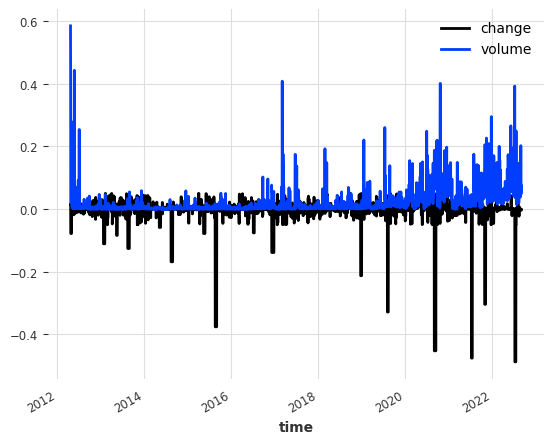

In [5]:
# model_trainer.ts_test.plot( label = ["change test", "volume test"])
model_trainer.ts_train.plot()

INFO: GPU available: False, used: False
INFO:lightning.pytorch.utilities.rank_zero:GPU available: False, used: False
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: IPU available: False, using: 0 IPUs
INFO:lightning.pytorch.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00,  6.41it/s]


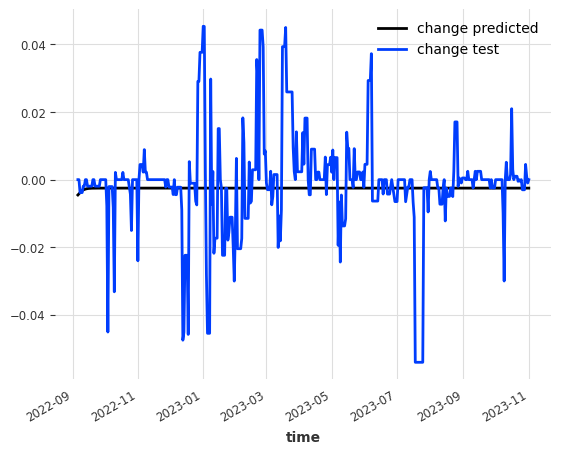

In [6]:
y_hat = model_trainer.predict_and_plot(which_column = "change")

<Axes: xlabel='time'>

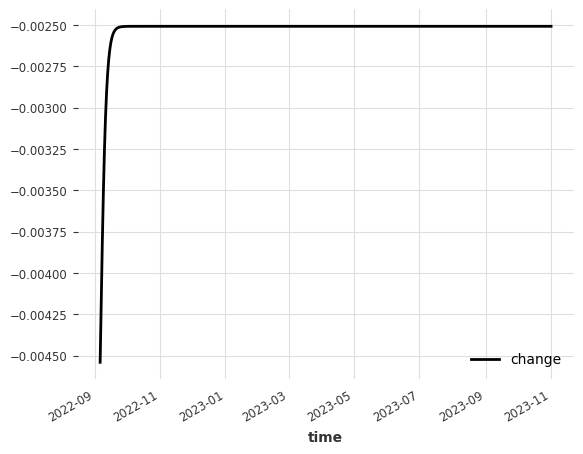

In [7]:
y_hat["change"].plot()

In [10]:
from darts.metrics.metrics import mse, mae, rmse
metrics = [mse, mae, rmse]
model_trainer.evaluate_metrics(metrics)

{'mse': 0.01962788719333389,
 'mae': 0.0784161871568,
 'rmse': 0.10635725005223287}